In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Equipe
### Ícaro de Lima - 385194 <br> Thalisson Felipe - 390195

# 1. Importar e separar o conjunto de dados fornecido em treinamento e teste

In [38]:
df = pd.read_csv('noticias.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Nessa primeira parte após importamos o dataset, realizamos um pre-processamento "simples" nos dados. Criamos um nova variável X representando a concatenação das strings title e text. Por exemplo: You Can Smell Hillary’s Fear Daniel Greenfield, a Shillman Journalism Fello... seria o primeiro elemento de X. E segundo representaos os labels FAKE e REAL em uma representação binária 0 e 1, respectivamente.

In [39]:
X, y = (df['title'] +  ' ' + df['text']).values, df['label'].replace(['FAKE', 'REAL'], [0, 1]).values

# 2. Criar uma matriz vetorizada que represente os textos utilizando o CountVectorizer

In [4]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(X)
count_vectorizer_X = count_matrix.toarray() # matriz vetorizada

# 3. Criar uma matriz vetorizada que represente os textos utilizando o TfidfVectorizer

In [5]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X)
tfidf_vectorizer_X = tfidf_matrix.toarray() # matriz vetorizada

# 4. Criar dois modelos para classificar os textos utilizando o algoritmo Naive Bayes (multinomial) utilizando o CountVectorizer e o TfidfVectorizer

## 4.1 Naive Bayes utilizando o CountVectorizer

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(count_vectorizer_X, y, test_size=0.4, random_state=42)
clf1 = MultinomialNB().fit(X_train1, y_train1)

## 4.2 Naive Bayes utilizando o TfidfVectorizer

In [11]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(tfidf_vectorizer_X, y, test_size=0.4, random_state=42)
clf2 = MultinomialNB().fit(X_train2, y_train2)

# 5. Comparar os resultados utilizando a precisão e a Matriz de Confusão

Acurácia utilizando CountVectorizer:  0.8904830224772836


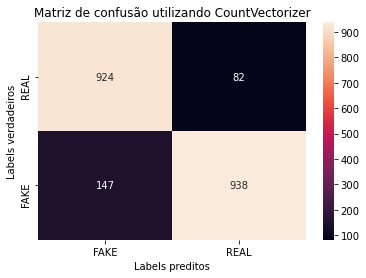

In [8]:
y_pred1 = clf1.predict(X_test1)
accuracy1 = accuracy_score(y_pred1, y_test1)
cm1 = confusion_matrix(y_pred1, y_test1)

print('Acurácia utilizando CountVectorizer: ', accuracy1)

ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Labels preditos')
ax.set_ylabel('Labels verdadeiros')
ax.set_title('Matriz de confusão utilizando CountVectorizer')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['REAL', 'FAKE'])
plt.show()

Acurácia utilizando TfidfVectorizer:  0.7699665231946438


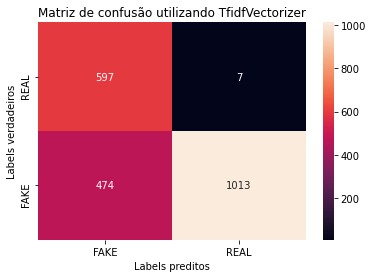

In [9]:
y_pred2 = clf2.predict(X_test2)
accuracy2 = accuracy_score(y_pred2, y_test2)
cm2 = confusion_matrix(y_pred2, y_test2)

print('Acurácia utilizando TfidfVectorizer: ', accuracy2)

ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Labels preditos')
ax.set_ylabel('Labels verdadeiros')
ax.set_title('Matriz de confusão utilizando TfidfVectorizer')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['REAL', 'FAKE'])
plt.show()

# 6. [BÔNUS] Propor passos adicionais para melhorar os resultados encontrados

Primeiramente, podemos realizar um melhor pre-processamento nos dados. Podemos remover todas pontuações do texto e remover espaços duplicados caso existam.

In [47]:
# X é um array com textos
def preprocess(X):
    X_processed = []
    for string in X:
        x_processed = string.lower() # lowercase
        x_processed = re.sub('[^a-z\s]+', ' ', string) # remove pontuações
        x_processed = re.sub('(\s+)', ' ', x_processed) # remove espaços duplicados
        x_processed = re.sub(r'\d+', '', x_processed) # remove números
        X_processed.append(x_processed)
    
    return X_processed

In [48]:
X_processed = preprocess(X)

Outro pre-processammento que podemos fazer é remover stop_words, que são palavras como "the, and, him".

In [49]:
new_count_vectorizer = CountVectorizer(stop_words='english')
new_count_matrix = new_count_vectorizer.fit_transform(X_processed)
new_count_vectorizer_X = new_count_matrix.toarray()

In [50]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(new_count_vectorizer_X, y, test_size=0.4, random_state=42)
clf3 = MultinomialNB()
clf3.fit(X_train3, y_train3)

MultinomialNB()

Acurácia utilizando CountVectorizer:  0.9116022099447514


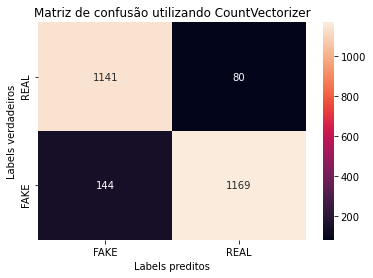

In [51]:
y_pred3 = clf3.predict(X_test3)
accuracy3 = accuracy_score(y_pred3, y_test3)
cm3 = confusion_matrix(y_pred3, y_test3)

print('Acurácia utilizando CountVectorizer: ', accuracy3)

ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Labels preditos')
ax.set_ylabel('Labels verdadeiros')
ax.set_title('Matriz de confusão utilizando CountVectorizer')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['REAL', 'FAKE'])
plt.show()

In [52]:
new_tfidf_vectorizer = TfidfVectorizer(stop_words='english')
new_tfidf_matrix = new_tfidf_vectorizer.fit_transform(X_processed)
new_tfidf_vectorizer_X = new_tfidf_matrix.toarray() # matriz vetorizada

In [54]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(new_tfidf_vectorizer_X, y, test_size=0.4, random_state=0)
clf4 = MultinomialNB()
clf4.fit(X_train4, y_train4)

MultinomialNB()

Acurácia utilizando TfidfVectorizer:  0.8145224940805051


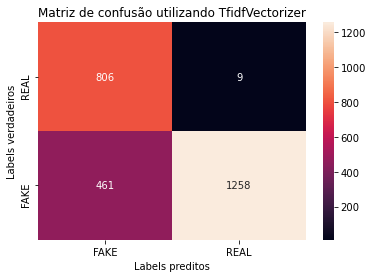

In [55]:
y_pred4 = clf4.predict(X_test4)
accuracy4 = accuracy_score(y_pred4, y_test4)
cm4 = confusion_matrix(y_pred4, y_test4)

print('Acurácia utilizando TfidfVectorizer: ', accuracy4)

ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Labels preditos')
ax.set_ylabel('Labels verdadeiros')
ax.set_title('Matriz de confusão utilizando TfidfVectorizer')
ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
ax.yaxis.set_ticklabels(['REAL', 'FAKE'])
plt.show()